<a href="https://colab.research.google.com/github/Harsh-COE/ML/blob/main/ML_Heart_Clinical_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df1 = pd.read_csv("data.csv" )


In [ ]:
df1.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


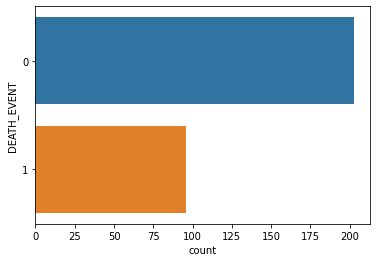

In [ ]:
import seaborn as sns
sns.countplot(y=df1.iloc[:,12],data=df1)


In [ ]:
df1.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
df1.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
df1.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
%matplotlib inline


###  **FOR PLOTTING HISTOGRAM**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16263043d0>,
      dtype=object)

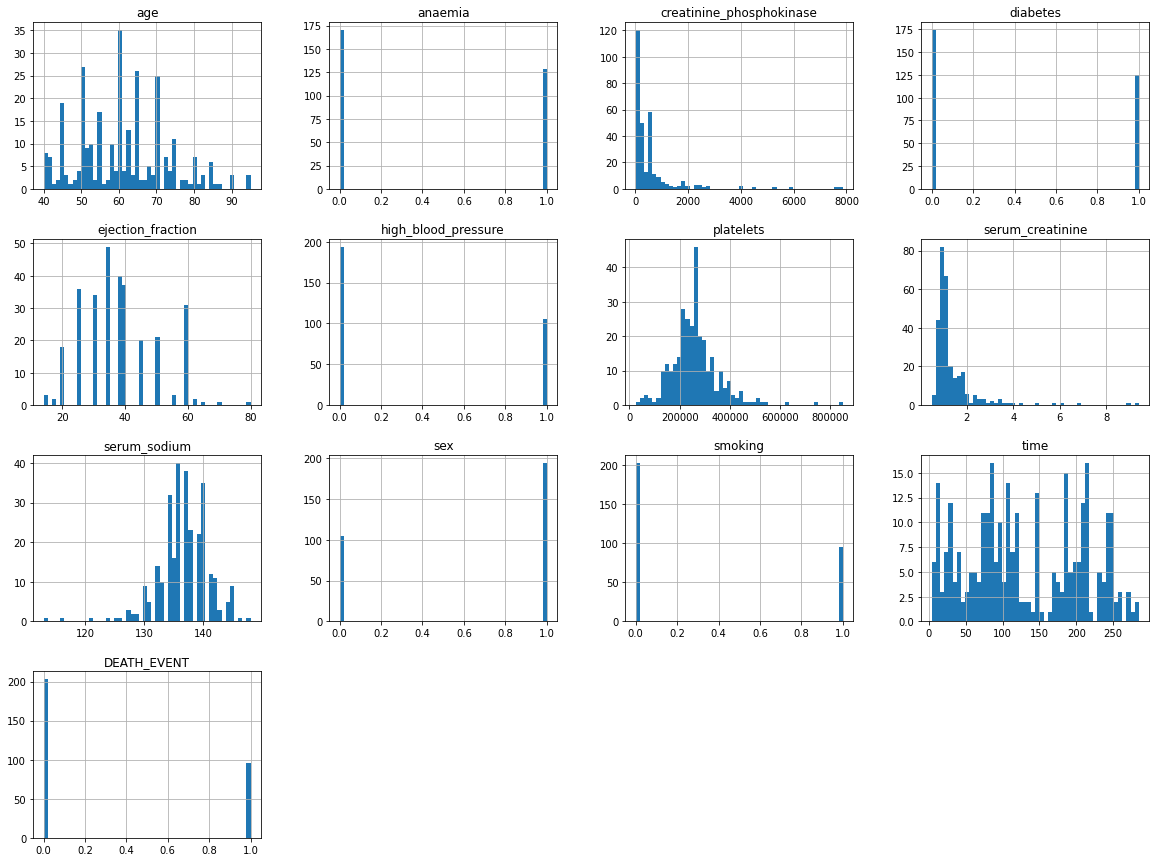

In [ ]:
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20, 15))

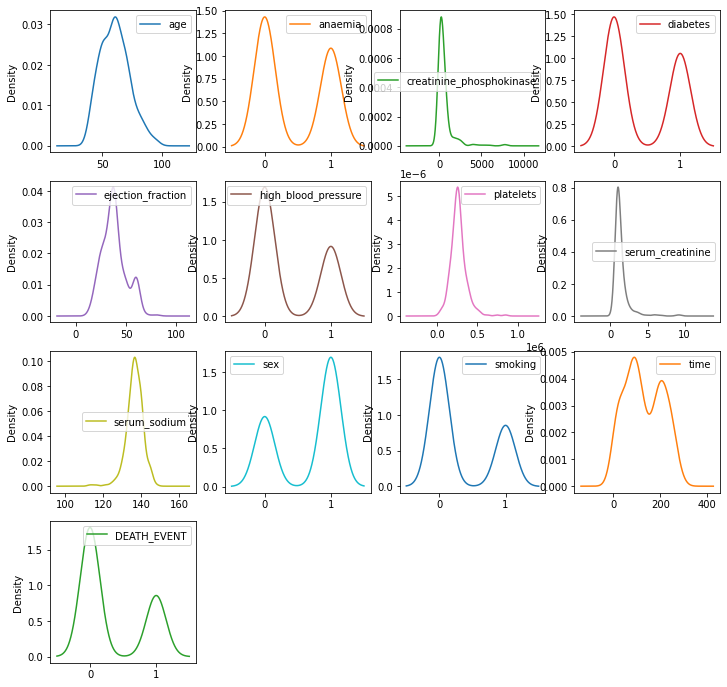

In [ ]:
df1.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));


age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

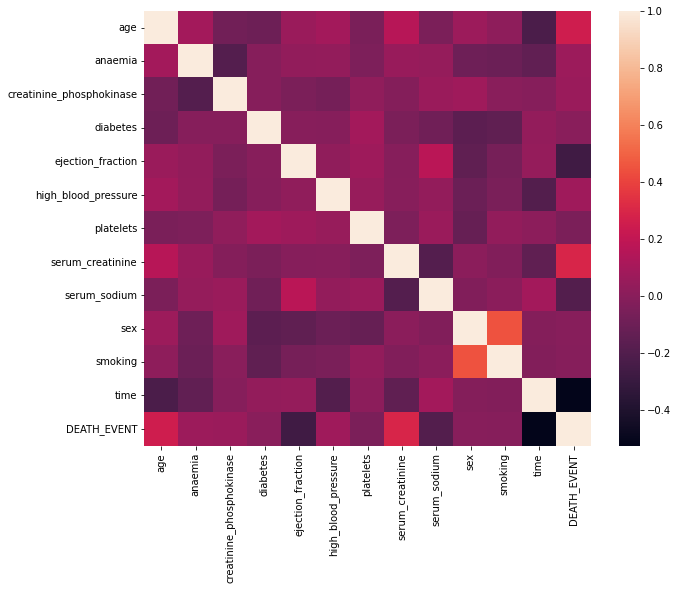

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr())
df1.corr()[abs(df1.corr()['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

In [ ]:
# df = df1.drop(columns='time', axis=1)
# print();
# print(df1.head())


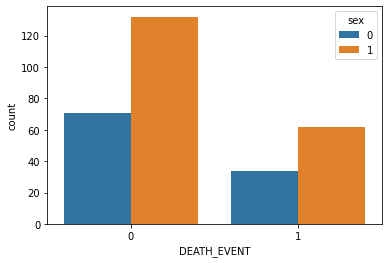

In [ ]:
sns.countplot(x='DEATH_EVENT',hue='sex',data=df1)

### **TRAINING AND TESTING DATA SPLIT**

In [ ]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(df1, 0.2)

[281 265 164   9  77 278  93 109   5 173  97 195 184 154  57  60 147 108
  63 140 155 104 247  46  42 275 280 116 213 236  17 239  33  24  45   7
 113 194 111  92  75  82 118  76 129 197 210 288 219 178 144 186  84 248
 277  73 244  25 209  59   6 183 185 146  30  22 254  56 237 285 126 228
 283 255 158 225  78  66 296 192 181  19 170  79  90 132  72  15  10 157
 224  68 222  37  16 119 268 269  67 101  69  31 172 148 223 114  18 179
  96 165 291  86 246 143 231 124 139 152 204  55 232 182 180 137 251  38
 125 193 167 203 112 264 117 282 273 221 176   2 115 177 175 120 208 259
 127  74  29  83 261 107 287 245 250 294 230  65 196  85 211 159  12  35
  28 142 229 279 168  51  95 206 218  41  89 215 136  26 292 141 198   0
 267 271 100 258 253 171  98  36  61 150 234 200 240  11 295 266  27 242
   4 122  32 202 162 226 256 138  62 135 128 289   8  70 263  64  44 233
 156  40 123 274 216 153  23 260 110  81 207 212  39 238 290 284 199  14
  47  94 262 227 272 201 161  43 217 145 190 220 24

In [ ]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 240
Rows in test set: 59



In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(df1, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 239
Rows in test set: 60



In [ ]:
X = df1.drop(columns='DEATH_EVENT', axis=1)
Y = df1['DEATH_EVENT']

In [ ]:
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(299, 12) (239, 12) (60, 12)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)
accuracy_list = []


model.fit(X_train, Y_train)
log_reg_pred = model.predict(X_test)
log_reg_acc = accuracy_score(Y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

Accuracy on Training data :  0.8326359832635983


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(Y_test,log_reg_pred))
print(classification_report(Y_test,log_reg_pred))
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

[[37  4]
 [ 8 11]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.73      0.58      0.65        19

    accuracy                           0.80        60
   macro avg       0.78      0.74      0.75        60
weighted avg       0.79      0.80      0.79        60

Accuracy of Logistic Regression is :  80.00%


Text(0.5, 1.0, 'Logistic Regression')

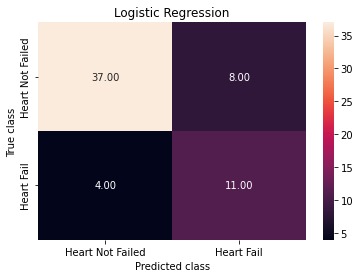

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

from sklearn import metrics

log_reg_y_pred = model.predict(X_test)
log_reg_cm = metrics.confusion_matrix(log_reg_y_pred, Y_test)
sns.heatmap(log_reg_cm, annot=True, fmt='.2f',
xticklabels = ["Heart Not Failed","Heart Fail"] ,
yticklabels = ["Heart Not Failed","Heart Fail"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8


[[31 10]
 [14  5]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        41
           1       0.33      0.26      0.29        19

    accuracy                           0.60        60
   macro avg       0.51      0.51      0.51        60
weighted avg       0.58      0.60      0.59        60



Text(0.5, 1.0, 'Logistic Regression')

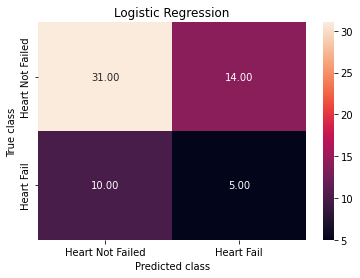

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


log_reg_cm = metrics.confusion_matrix(y_pred, Y_test)
sns.heatmap(log_reg_cm, annot=True, fmt='.2f',
xticklabels = ["Heart Not Failed","Heart Fail"] ,
yticklabels = ["Heart Not Failed","Heart Fail"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')





In [ ]:
training_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy on Training data : ', training_accuracy)

Accuracy on Training data :  0.6


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [42]:
print("Naive Bayes score: ",nb.score(X_test, Y_test))


Naive Bayes score:  0.8
